In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data preparation

- Download the data, read it with pandas
- Look at the data
- Make column names and values look uniform
- Check if all the columns read correctly
- Check if the churn variable needs any preparation

In [275]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [276]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [277]:
df.shape

(7043, 21)

In [278]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

strings = list(df.dtypes[df.dtypes == 'O'].index)

for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [279]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [280]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [281]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [282]:
df.isnull().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [283]:
df['totalcharges'] = df['totalcharges'].fillna(df['totalcharges'].mean())

In [284]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [285]:
df.churn = (df.churn == 'yes').astype(int)

#Setting up the validation framework

- Perform the train/validation/test split with Scikit-Learn

In [286]:
from sklearn.model_selection import train_test_split

In [287]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [288]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [289]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [290]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [291]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

#EDA

- Check missing values
- Look at the target variable (churn)
- Look at numerical and categorical variables

In [292]:
df_full_train = df_full_train.reset_index(drop=True)

In [293]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [294]:
np.round(df.churn.mean(), 2) 
#mean value for binary column gives the percentage over total counts

0.27

In [295]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [296]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [297]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

#Feature importance: Churn rate and risk ratio

- Feature importance analysis (part of EDA) - identifying which features affect our target variable

- Churn rate
- Risk ratio

In [298]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


### Churn Rate

In [299]:
female_churn = df_full_train[df_full_train.gender == 'female'].churn.mean()
female_churn

0.27682403433476394

In [300]:
male_churn = df_full_train[df_full_train.gender == 'male'].churn.mean()
male_churn

0.2632135306553911

In [301]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

In [302]:
global_churn - female_churn

-0.006855983216553063

In [303]:
global_churn - male_churn

0.006754520462819769

In [304]:
df_full_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [305]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [306]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [307]:
global_churn - churn_partner

0.06493474245795922

In [308]:
global_churn - churn_no_partner

-0.05984095297455855

### Risk Ratio

In [309]:
churn_partner / global_churn

0.7594724924338315

In [310]:
churn_no_partner / global_churn

1.2216593879412643

Use this template and replicate in pandas
```
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM
    data
GROUP BY
    gender;
```

In [311]:
from IPython.display import display

In [312]:
for col in categorical:
    df_group = df_full_train.groupby(col).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


# Feature importance: Mutual information

- Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another

- https://en.wikipedia.org/wiki/Mutual_information

In [313]:
from sklearn.metrics import mutual_info_score

In [314]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [315]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [316]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [317]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

#Feature importance: Correlation

- How about numerical columns?

- Correlation coefficient - https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [318]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.197365
dtype: float64

In [319]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.197365
dtype: float64

In [320]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [321]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure < 12)].churn.mean()

0.4059003051881994

In [322]:
df_full_train[df_full_train.tenure >12].churn.mean()

0.17634908339788277

In [323]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [324]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges < 50)].churn.mean()

0.1836890243902439

In [325]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

0.32499341585462205

#One-hot encoding

- Use Scikit-Learn to encode categorical features

In [326]:
from sklearn.feature_extraction import DictVectorizer

In [327]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

#Logistic regression

- Binary classification
- Linear vs logistic regression

In [328]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [329]:
z = np.linspace(-7, 7, 51)

In [330]:
sigmoid(10)

0.9999546021312976

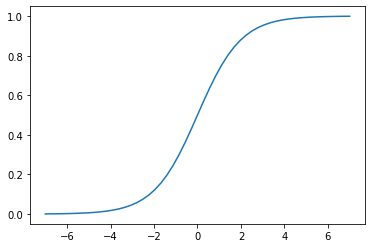

In [331]:
plt.plot(z, sigmoid(z))

In [332]:
def linear_regression(xi):
    res = 0

    for j in range(len(xi)):
        res = res + xi[j] * w[j]
    
    return res

In [333]:
def logistic_regression(xi):
    score = 0

    for j in range(len(xi)):
        score = score + xi[j] * w[j]
    
    result = sigmoid(score)
    return result

#Training logistic regression with Scikit-Learn

- Train a model with Scikit-Learn
- Apply it to the validation dataset
- Calculate the accuracy

In [334]:
from sklearn.linear_model import LogisticRegression

In [335]:
model = LogisticRegression(solver='newton-cg')
model.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [336]:
model.intercept_[0]

0.21717244010746742

In [337]:
model.coef_[0].round(3)

array([ 0.677,  0.024, -0.701,  0.037, -0.037,  0.1  , -0.18 ,  0.08 ,
        0.019, -0.019, -0.525,  0.705, -0.18 , -0.019, -0.198,  0.039,
        0.159,  0.102, -0.18 ,  0.078,  0.272, -0.18 , -0.091, -0.181,
        0.181, -0.063,  0.063, -0.064, -0.014,  0.097, -0.019,  0.039,
       -0.039,  0.193, -0.113, -0.18 ,  0.293, -0.071, -0.18 ,  0.251,
        0.22 , -0.18 , -0.04 , -0.066,  0.   ])

In [338]:
y_pred = model.predict_proba(X_val)[:,1]

In [339]:
churn_decision = (y_pred >= 0.5)

In [340]:
(y_val == churn_decision).mean()

0.8041163946061036

In [341]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [342]:
df_pred

,probability,prediction,actual
0,0.006743,0,0
1,0.202049,0,0
2,0.215615,0,0
3,0.562877,1,1
4,0.215965,0,0
...,...,...,...
1404,0.295457,0,0
1405,0.041904,0,1
1406,0.152327,0,0
1407,0.789993,1,1


In [343]:
(df_pred['prediction'] == df_pred['actual']).mean()

0.8041163946061036

#Model interpretation

- Look at the coefficients
- Train a smaller model with fewer features

In [344]:
a = [1, 2, 3, 4]
b = 'abcd'

In [345]:
dict(zip(a, b))

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [346]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.677,
 'contract=one_year': 0.024,
 'contract=two_year': -0.701,
 'dependents=no': 0.037,
 'dependents=yes': -0.037,
 'deviceprotection=no': 0.1,
 'deviceprotection=no_internet_service': -0.18,
 'deviceprotection=yes': 0.08,
 'gender=female': 0.019,
 'gender=male': -0.019,
 'internetservice=dsl': -0.525,
 'internetservice=fiber_optic': 0.705,
 'internetservice=no': -0.18,
 'monthlycharges': -0.019,
 'multiplelines=no': -0.198,
 'multiplelines=no_phone_service': 0.039,
 'multiplelines=yes': 0.159,
 'onlinebackup=no': 0.102,
 'onlinebackup=no_internet_service': -0.18,
 'onlinebackup=yes': 0.078,
 'onlinesecurity=no': 0.272,
 'onlinesecurity=no_internet_service': -0.18,
 'onlinesecurity=yes': -0.091,
 'paperlessbilling=no': -0.181,
 'paperlessbilling=yes': 0.181,
 'partner=no': -0.063,
 'partner=yes': 0.063,
 'paymentmethod=bank_transfer_(automatic)': -0.064,
 'paymentmethod=credit_card_(automatic)': -0.014,
 'paymentmethod=electronic_check': 0.097,
 'paymentm

In [347]:
small = ['contract', 'tenure', 'monthlycharges']

In [348]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [349]:
dict_train_small = df_train[small].to_dict(orient='records')
dict_val_small = df_val[small].to_dict(orient='records')

In [350]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dict_train_small)

DictVectorizer(sparse=False)

In [351]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [352]:
X_train_small = dv_small.transform(dict_train_small)

In [353]:
model_small = LogisticRegression(solver='newton-cg')
model_small.fit(X_train_small, y_train)

LogisticRegression(solver='newton-cg')

In [354]:
w0 = model_small.intercept_[0]
w0

-2.478282864484442

In [355]:
w = model_small.coef_[0].round(3)
w

array([ 0.971, -0.023, -0.948,  0.027, -0.036])

In [356]:
dict(zip(dv_small.get_feature_names_out(), w))

{'contract=month-to-month': 0.971,
 'contract=one_year': -0.023,
 'contract=two_year': -0.948,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [357]:
-2.57 + 1.04 + 50 * 0.028 + 24 * (-0.036)

-0.9939999999999996

In [358]:
sigmoid(_)

0.27012272713050867

#Using the model

In [359]:
dict_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [360]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dict_full_train)

In [361]:
y_full_train = df_full_train.churn.values

In [362]:
model = LogisticRegression(solver='newton-cg')
model.fit(X_full_train, y_full_train)

LogisticRegression(solver='newton-cg')

In [363]:
dict_test = df_test[categorical + numerical].to_dict(orient='records')

In [364]:
X_test = dv.transform(dict_test)

In [365]:
y_pred = model.predict_proba(X_test)[:,1]

In [366]:
churn_decision = (y_pred >= 0.5)

In [367]:
(churn_decision == y_test).mean()

0.8112136266855926

In [368]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [373]:
customer = dict_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [374]:
X_small = dv.transform(customer)

In [375]:
model.predict_proba(X_small)[0,1]

0.6405769437777913

In [376]:
y_test[-1]

1